In [2]:

import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing import image # Keras own inbuild image class
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras import preprocessing 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten,\
BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from lime import lime_image

In [6]:
import pandas as pd
import numpy as np

In [7]:
import itertools

In [6]:
from sklearn.metrics import confusion_matrix

In [8]:
import os
import seaborn as sns
import cv2

In [29]:
classes = ['Pneumonia', 'Normal', 'Covid' ]
base_path = 'train'

In [30]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2) 

train_batches = train_datagen.flow_from_directory(directory=base_path, \
target_size=(224,224), classes= classes, batch_size=64,subset='training')

validation_batches = train_datagen.flow_from_directory(directory=base_path, \
target_size=(224,224), classes=classes, batch_size=64,subset='validation')


Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


In [31]:
imgs, y_imgs= next(train_batches)

In [32]:
imgs.shape, y_imgs.shape

((64, 224, 224, 3), (64, 3))

In [33]:
def plotImages(images_T):
    fig, axes = plt.subplots(5, 5, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip( images_T, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

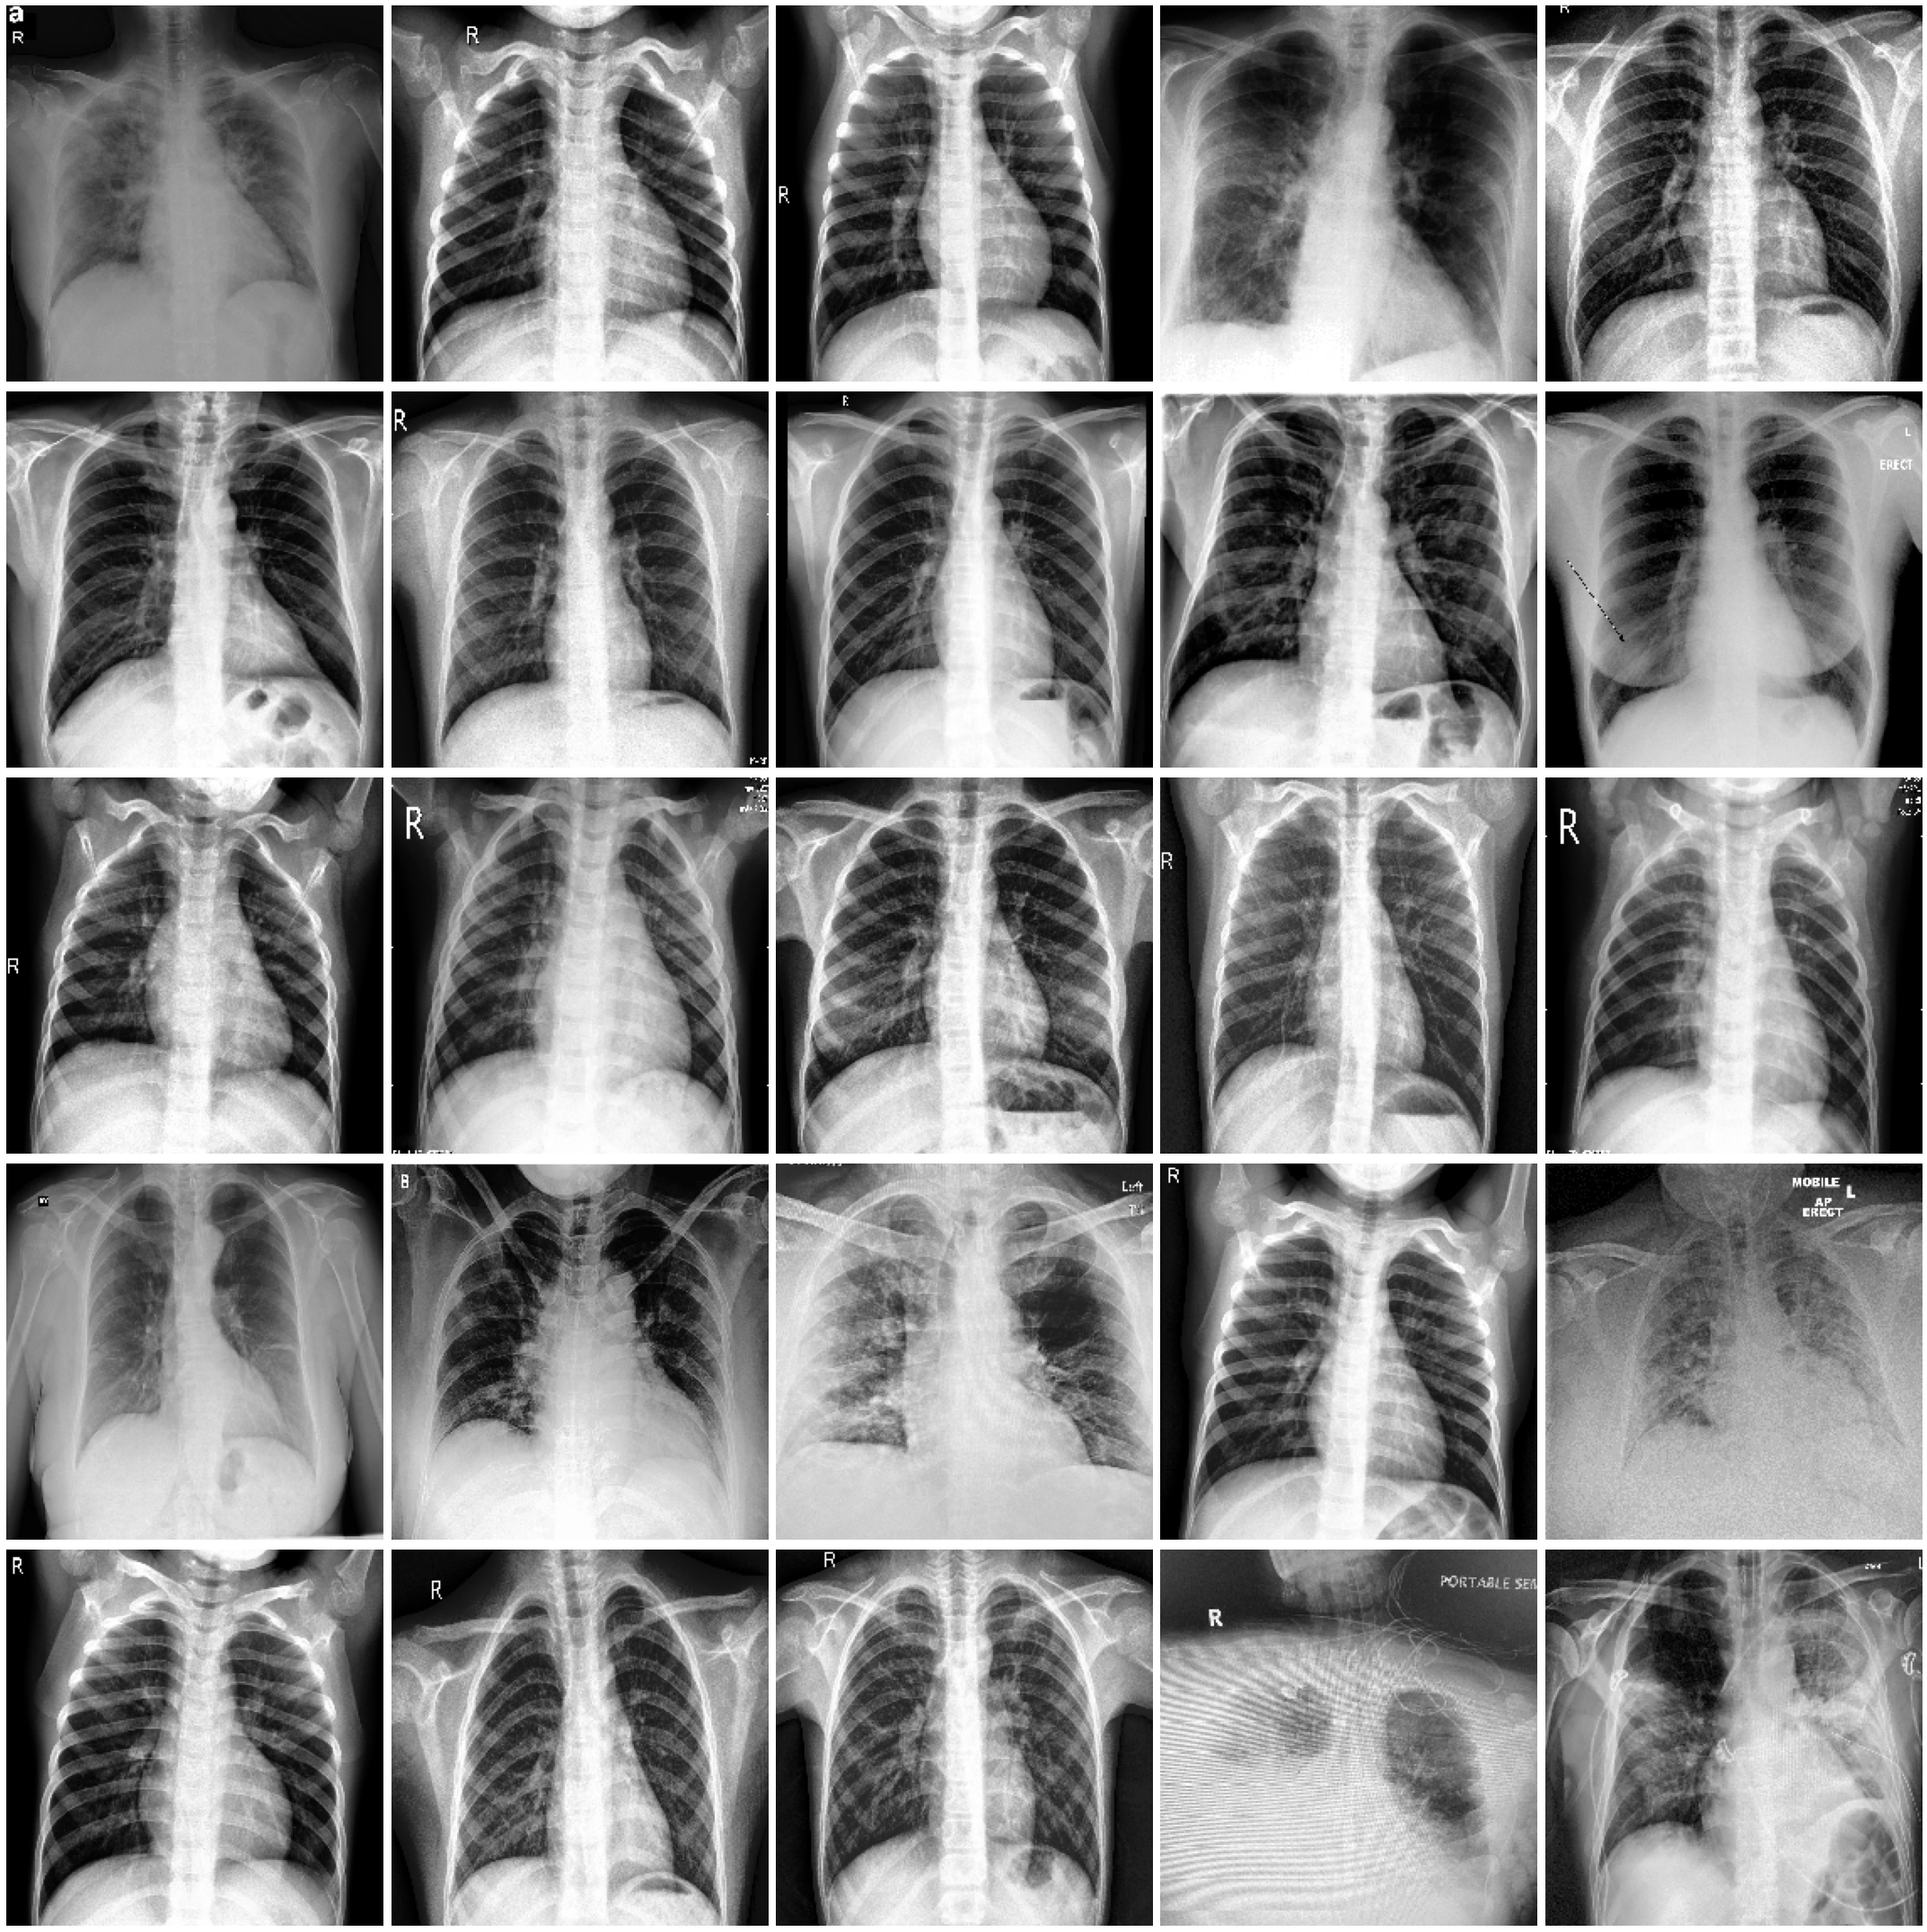

In [34]:
plotImages(imgs)

In [35]:
classes

['Pneumonia', 'Normal', 'Covid']

In [36]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=256, activation='relu'),
    # Dense(units=128, activation='relu'),
    # Dense(units=64, activation='relu'),
    # Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=3, activation='softmax')
])

2021-12-15 20:10:52.075087: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-15 20:10:52.076750: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [37]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',\
metrics=['accuracy'])

In [38]:
# model.fit_generator(x=train_batches,validation_ epochs=5, verbose=1)
hist = model.fit(
    train_batches,
    validation_data = validation_batches, 
    epochs = 10)

Train for 4 steps, validate for 1 steps
Epoch 1/10
4/4 [==============================] - 40s 10s/step - loss: 1.0631 - accuracy: 0.4129 - val_loss: 1.0785 - val_accuracy: 0.4400
Epoch 2/10
4/4 [==============================] - 39s 10s/step - loss: 1.0406 - accuracy: 0.4428 - val_loss: 1.0397 - val_accuracy: 0.4400
Epoch 3/10
4/4 [==============================] - 39s 10s/step - loss: 0.9930 - accuracy: 0.4677 - val_loss: 0.9863 - val_accuracy: 0.4400
Epoch 4/10
4/4 [==============================] - 39s 10s/step - loss: 0.9023 - accuracy: 0.5423 - val_loss: 0.9158 - val_accuracy: 0.6600
Epoch 5/10
4/4 [==============================] - 40s 10s/step - loss: 0.8397 - accuracy: 0.6766 - val_loss: 0.8492 - val_accuracy: 0.5800
Epoch 6/10
4/4 [==============================] - 41s 10s/step - loss: 0.6928 - accuracy: 0.6766 - val_loss: 0.7006 - val_accuracy: 0.7000
Epoch 7/10
4/4 [==============================] - 39s 10s/step - loss: 0.5778 - accuracy: 0.7662 - val_loss: 0.5708 - val_accu

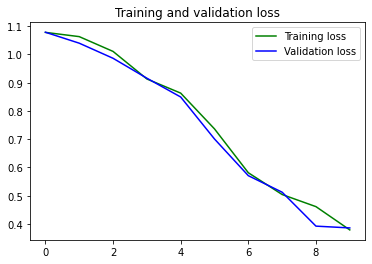

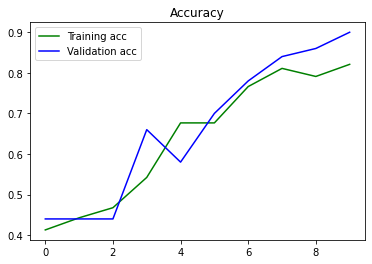

In [39]:
# Display models statistics
from matplotlib import pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochsr = range(10)
plt.figure()
plt.plot(epochsr, loss, 'g', label='Training loss')
plt.plot(epochsr, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochsr, acc, 'g', label='Training acc')
plt.plot(epochsr, val_acc, 'b', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.show()
mymodel = hist.model

In [40]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [41]:
from tensorflow.keras.models import load_model

In [42]:
model = load_model("model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 346112)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                1

In [43]:
def TestImgPreprocessing(path):
    '''
    Resizes all images in a given file path to (224,224) and MinMax scales 
    Return array of images
    Adapted from https://stackoverflow.com/questions/21517879/
    python-pil-resize-all-images-in-a-folder
    '''
    from PIL import Image
    import os
    dirs = sorted(os.listdir(path))
    images = []
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((224,224), Image.ANTIALIAS)
            imResize = np.asarray(imResize)/255
            images.append(imResize)
    return np.asarray(images)

In [47]:
test_imgs = TestImgPreprocessing('test/Normal/')

In [48]:
test_imgs.shape

(20, 224, 224, 3)

In [49]:
predictions = np.round(model.predict(test_imgs))

In [50]:
predictions 

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [72]:
me= model.predict(np.expand_dims(test_imgs[0], axis=0))

<BarContainer object of 3 artists>

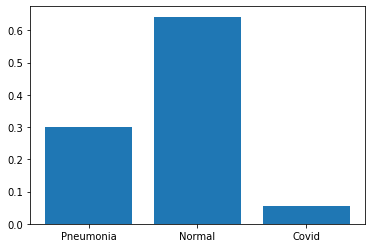

In [56]:
plt.bar(x= classes, height =model.predict(np.expand_dims(test_imgs[0], axis=0))[0] )

In [ ]:
im = Image.open(image)
    imResize = im.resize((224,224), Image.ANTIALIAS)
    imResize = np.asarray(imResize)/255
    converted_image = np.asarray(imResize)
    converted_image = np.expand_dims(converted_image, axis=0)

In [59]:
from PIL import Image

In [60]:
im = Image.open('0121.jpeg')
imResize = im.resize((224,224), Image.ANTIALIAS)
imResize = np.asarray(imResize)/255
converted_image = np.asarray(imResize)
converted_image = np.expand_dims(converted_image, axis=0)